In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mysql.connector
import data_loader as dl
import numpy as np

In [3]:
connection = mysql.connector.connect(host='localhost',
                                        database='creditcard_capstone',
                                        user='root',
                                        password='a')
df_loans = dl.load_table(connection, 'cdw_sapp_loan_application')

Database connection is closed


In [4]:
df_loans.head()

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP002455,Y,1,2,Graduate,Male,low,Yes,Semiurban,No
1,LP001955,N,1,0,Graduate,Female,medium,No,Rural,No
2,LP001528,N,0,0,Graduate,Male,medium,No,Rural,No
3,LP001529,Y,1,0,Graduate,Male,low,Yes,Rural,Yes
4,LP001963,N,1,1,Graduate,Male,low,Yes,Urban,No


In [8]:
df_married = df_loans.loc[df_loans['Married']=='Yes']
df_married

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP002455,Y,1,2,Graduate,Male,low,Yes,Semiurban,No
3,LP001529,Y,1,0,Graduate,Male,low,Yes,Rural,Yes
4,LP001963,N,1,1,Graduate,Male,low,Yes,Urban,No
5,LP001964,N,0,0,Not Graduate,Male,low,Yes,Urban,No
6,LP002459,Y,1,0,Graduate,Male,medium,Yes,Urban,No
...,...,...,...,...,...,...,...,...,...,...
505,LP001508,Y,1,2,Graduate,Male,high,Yes,Urban,No
506,LP001514,Y,1,0,Graduate,Female,low,Yes,Semiurban,No
507,LP001516,Y,1,2,Graduate,Female,high,Yes,Urban,No
508,LP001518,Y,1,1,Graduate,Male,low,Yes,Urban,No


In [51]:
income_groups = ['Low Income', 'Medium Income', 'High Income']

In [33]:
filtered_data = df_married.groupby(['Income','Gender','Application_Status'])['Gender'].count()
filtered_data

Income  Gender  Application_Status
high    Female  N                       1
                Y                       3
        Male    N                       9
                Y                      17
low     Female  N                       3
                Y                      10
        Male    N                      46
                Y                     119
medium  Female  N                       4
                Y                       4
        Male    N                      32
                Y                      83
Name: Gender, dtype: int64

In [37]:
filtered_list = filtered_data.array.tolist()

In [38]:
total = [sum(filtered_list[i:i+2]) for i in range(0, len(filtered_list), 2)]
total

[4, 26, 13, 165, 8, 115]

In [39]:
approved = [filtered_list[i] for i in range(1, len(filtered_list), 2)]
approved

[3, 17, 10, 119, 4, 83]

In [42]:
approval_rate = [approved[i]/total[i]*100 for i in range(len(approved))]
approval_rate

[75.0,
 65.38461538461539,
 76.92307692307693,
 72.12121212121212,
 50.0,
 72.17391304347827]

In [44]:
women = [approval_rate[i] for i in range(0, len(approval_rate), 2)]
women

[75.0, 76.92307692307693, 50.0]

In [45]:
men = [approval_rate[i] for i in range(1, len(approval_rate), 2)]
men

[65.38461538461539, 72.12121212121212, 72.17391304347827]

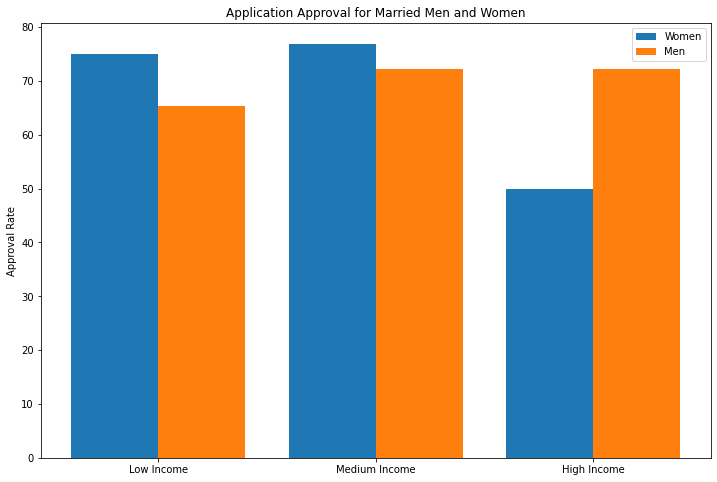

In [53]:
X_axis = np.arange(len(income_groups))
plt.figure(figsize=[12,8])
plt.bar(X_axis - 0.2, women, 0.4, label = 'Women')
plt.bar(X_axis + 0.2, men, 0.4, label = 'Men')
plt.xticks(X_axis, income_groups)
plt.ylabel("Approval Rate")
plt.title("Application Approval for Married Men and Women")
plt.legend()
plt.show()

In [54]:
property_area = ['Rural', 'Semiurban', 'Urban']

In [56]:
grouped_by_area = df_loans.groupby(['Property_Area','Application_Status'])['Property_Area'].count()
grouped_by_area

Property_Area  Application_Status
Rural          N                      59
               Y                      90
Semiurban      N                      44
               Y                     153
Urban          N                      61
               Y                     104
Name: Property_Area, dtype: int64

In [57]:
approval_status = grouped_by_area.array.tolist()
approval_status

[59, 90, 44, 153, 61, 104]

In [58]:
total_applications = [sum(approval_status[i:i+2]) for i in range(0, len(approval_status), 2)]
total_applications

[149, 197, 165]

In [60]:
approved_applications = [approval_status[i] for i in range(1, len(approval_status), 2)]
approved_applications

[90, 153, 104]

In [61]:
applications_approval_rate = [approved_applications[i]/total_applications[i]*100 for i in range(len(approved_applications))]
applications_approval_rate 

[60.40268456375839, 77.66497461928934, 63.030303030303024]

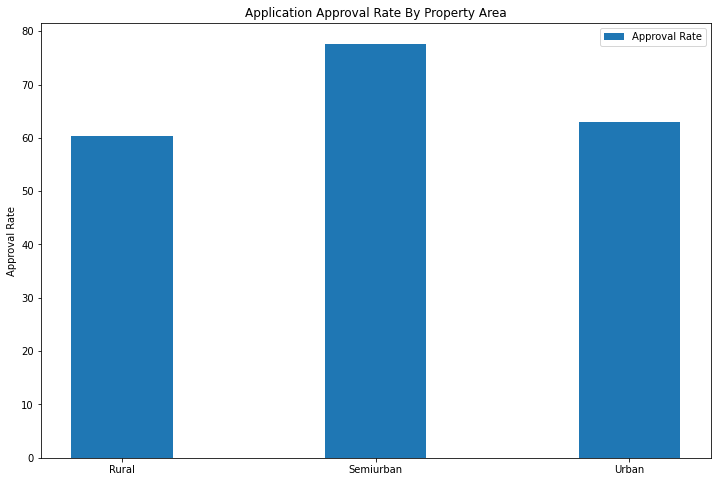

In [63]:
X_axis = np.arange(len(property_area))
plt.figure(figsize=[12,8])
plt.bar(X_axis, applications_approval_rate, 0.4, label = 'Approval Rate')
plt.xticks(X_axis, property_area)
plt.ylabel("Approval Rate")
plt.title("Application Approval Rate By Property Area")
plt.legend()
plt.show()